Integral estimada por Media Muestral:0.6391026460047897±0.006409773556580059
Intervalo de confianza por Media Muestral:(0.6265394898338928, 0.6516658021756866)
Integral estimada por Acierto y Error:0.601±0.015493193313162906
Intervalo de confianza por Acierto y Error:(0.5706333411062007, 0.6313666588937993)
n=1000
Integral estimada por Media Muestral:0.6312360561915699±0.006513905863943647
Intervalo de confianza por Media Muestral:(0.6184688006982403, 0.6440033116848994)
Integral estimada por Acierto y Error:0.608±0.01544585946377129
Intervalo de confianza por Acierto y Error:(0.5777261154510083, 0.6382738845489917)
n=10000
Integral estimada por Media Muestral:0.628571443388079±0.0020563120687468075
Intervalo de confianza por Media Muestral:(0.6245410717333353, 0.6326018150428228)
Integral estimada por Acierto y Error:0.6276±0.004834683176398074
Intervalo de confianza por Acierto y Error:(0.6181240209742598, 0.6370759790257403)
n=100000
Integral estimada por Media Muestral:0.6303011033

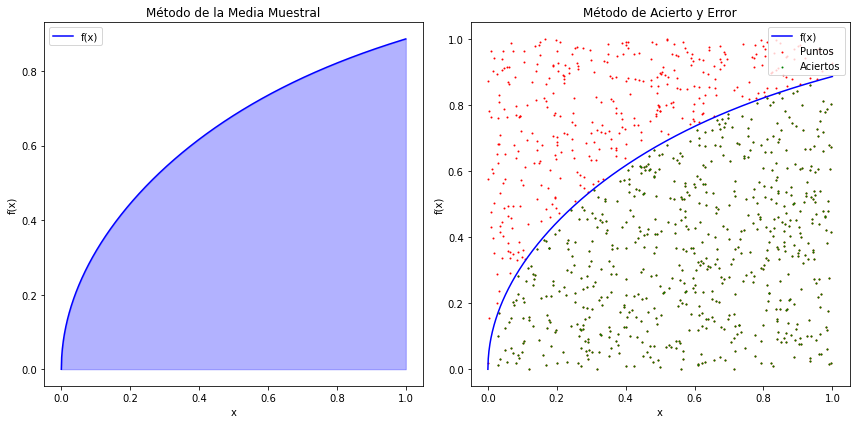

'\nResultados: \n\nIntegral estimada por Media Muestral:0.6226661937094974±0.006621964507089809\nIntervalo de confianza por Media Muestral:(0.6096871432756014, 0.6356452441433934)\nIntegral estimada por Acierto y Error:0.63±0.015275252316519362\nIntervalo de confianza por Acierto y Error:(0.6000605054596221, 0.6599394945403779)\nn=1000\nIntegral estimada por Media Muestral:0.6273085981455919±0.006556665366061929\nIntervalo de confianza por Media Muestral:(0.6144575340281105, 0.6401596622630733)\nIntegral estimada por Acierto y Error:0.633±0.015249378464171754\nIntervalo de confianza por Acierto y Error:(0.6031112182102234, 0.6628887817897766)\nn=10000\nIntegral estimada por Media Muestral:0.6300387377213358±0.0020623115308469643\nIntervalo de confianza por Media Muestral:(0.6259966071208757, 0.6340808683217959)\nIntegral estimada por Acierto y Error:0.6355±0.004813137399780079\nIntervalo de confianza por Acierto y Error:(0.626066250696431, 0.644933749303569)\nn=100000\nIntegral estimad

In [1]:
#Integración Monte-Carlo. 
"""
INTEGRACIÓN POR EL MÉTODO DE MONTE-CARLO. 
Vamos a integrar la función sqrt(arctan(x)). Por el método de Monte-Carlo. El método consiste
en generar una muestra de números aleatorios uniformemente distribuidos en el intervalo [a,b].
La integral, se estima como el promedio de la función evaluada en esos puntos, y se multiplica por
el tamaño del intervalo. También calcularemos el error, y el intervalo de confianza al 95%.

El método de acierto y error interpreta la integral como el área bajo la curva, de un rectángulo.
Generamos los puntos aleatorios dentro de tal rectángulo, y vamos a contar los que caen debajo
de la curva, una fracción, la integral es ése número multiplicado por el área del rectángulo.
Y calculamos el intervalo de confianza al 95% para el error.

Las gráficas nos mostrarán las áreas bajo la curva para ambos métodos, para observar de mejor
forma cómo funcionan los métodos. 
"""
import matplotlib.pyplot as plt
import random
import math
def f(x):
    return math.sqrt(math.atan(x))
def monte_carlo_media_muestral(f,a,b,n):
    x=[random.uniform(a,b)for _ in range(n)]
    fx=[f(xi)for xi in x]
    integral=(b-a)*sum(fx)/n
    error=(b-a)*(sum((fxi-integral/(b-a))**2 for fxi in fx)/(n-1))**0.5/(n**0.5)
    intervalo_confianza=(integral-1.96*error,integral+1.96*error)
    return integral,error,intervalo_confianza
def monte_carlo_acierto_error(f,a,b,n,c):
    x=[random.uniform(a,b)for _ in range(n)]
    y=[random.uniform(0,c)for _ in range(n)]
    under_curve=[1 if y[i]<f(x[i])else 0 for i in range(n)]
    integral=c*(b-a)*sum(under_curve)/n
    error=c*(b-a)*(sum((uc-integral/(c*(b-a)))**2 for uc in under_curve)/(n-1))**0.5/(n**0.5)
    intervalo_confianza=(integral-1.96*error,integral+1.96*error)
    return integral,error,intervalo_confianza
a,b=0,1
n=1000
c=1
integral_media_muestral,error_media_muestral,intervalo_media_muestral=monte_carlo_media_muestral(f,a,b,n)
print(f'Integral estimada por Media Muestral:{integral_media_muestral}±{error_media_muestral}')
print(f'Intervalo de confianza por Media Muestral:{intervalo_media_muestral}')
integral_acierto_error,error_acierto_error,intervalo_acierto_error=monte_carlo_acierto_error(f,a,b,n,c)
print(f'Integral estimada por Acierto y Error:{integral_acierto_error}±{error_acierto_error}')
print(f'Intervalo de confianza por Acierto y Error:{intervalo_acierto_error}')
resultados=[]
n_values=[1000,10000,100000]
for n in n_values:
    integral_media_muestral,error_media_muestral,intervalo_media_muestral=monte_carlo_media_muestral(f,a,b,n)
    integral_acierto_error,error_acierto_error,intervalo_acierto_error=monte_carlo_acierto_error(f,a,b,n,c)
    resultados.append((n,integral_media_muestral,error_media_muestral,intervalo_media_muestral,
                           integral_acierto_error,error_acierto_error,intervalo_acierto_error))
for r in resultados:
    n,integral_mm,error_mm,intervalo_mm,integral_ae,error_ae,intervalo_ae=r
    print(f'n={n}')
    print(f'Integral estimada por Media Muestral:{integral_mm}±{error_mm}')
    print(f'Intervalo de confianza por Media Muestral:{intervalo_mm}')
    print(f'Integral estimada por Acierto y Error:{integral_ae}±{error_ae}')
    print(f'Intervalo de confianza por Acierto y Error:{intervalo_ae}')
x=[a+i*(b-a)/1000 for i in range(1001)]
y=[f(xi)for xi in x]
plt.figure(figsize=(12,6))
print("Gráfica del método de la Media Muestral.")
plt.subplot(1,2,1)
plt.plot(x,y,label='f(x)',color='blue')
plt.title('Método de la Media Muestral')
plt.fill_between(x,y,alpha=0.3,color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
print("Gráfica del método de Acierto y Error.")
plt.subplot(1,2,2)
plt.plot(x,y,label='f(x)',color='blue')
x_points=[random.uniform(a,b)for _ in range(1000)]
y_points=[random.uniform(0,c)for _ in range(1000)]
plt.scatter(x_points,y_points,color='red',s=1,label='Puntos')
plt.scatter([x_points[i]for i in range(1000)if y_points[i]<f(x_points[i])],
            [y_points[i]for i in range(1000)if y_points[i]<f(x_points[i])],
            color='green',s=1,label='Aciertos')
plt.title('Método de Acierto y Error')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.tight_layout()
plt.show()
